In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [ ]:
df_US = df[df['job_country'] =='United States']
df_US_exploded = df_US.explode('job_skills')

In [4]:
df_skills = df_US_exploded.groupby(by=['job_title_short', 'job_skills']).size()
df_skills = df_skills.reset_index(name='skill_count')

In [5]:
df_skills.sort_values(by='skill_count', ascending=False, inplace=True)

In [6]:
import seaborn as sns

In [7]:
job_titles = df['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Senior Data Engineer']

In [11]:
df_skills

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


In [10]:
df_job_count = df_US['job_title_short'].value_counts().reset_index(name='job_count')

In [13]:
df_skill_percent = pd.merge(df_skills, df_job_count, how='left', on='job_title_short')
df_skill_percent['skill_percent'] = 100 * df_skill_percent['skill_count'] / df_skill_percent['job_count']

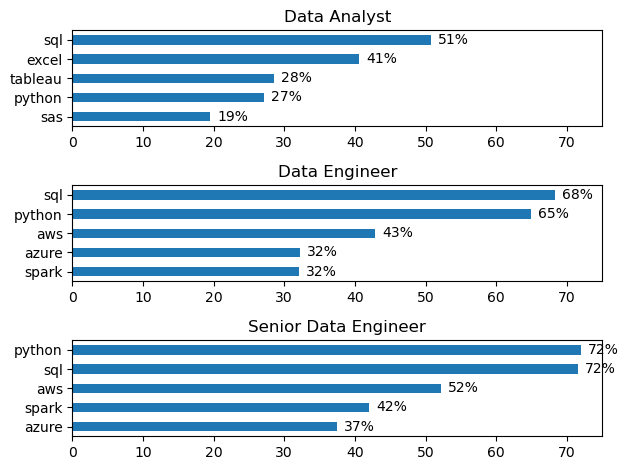

In [26]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_percent[df_skill_percent['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', y='skill_percent', x='job_skills', ax=ax[i], title=job_title)
    ax[i].legend().remove()
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 75)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')

plt.tight_layout()    